<a href="https://colab.research.google.com/github/SubalakshmiAriyaselvam/ML-MAJOR-MAY/blob/main/Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Libraries

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt        #Visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline

Reading the dataset

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Twitter-Sentiment-Analysis/master/train_tweet.csv")
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
dataset.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


Information about the dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
dataset['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Plotting of the Racist and Non-racist tweets in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


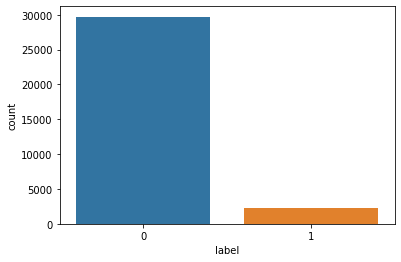

In [7]:
sns.countplot(dataset['label'])

In [8]:
dataset= dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 998.8+ KB


In [9]:
x=dataset.drop("id",axis=1)
x.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [10]:
print(" The shape of X is:", x.shape)

 The shape of X is: (31962, 2)


In [11]:
import nltk
## re -- regular expression
import re
from nltk.corpus import stopwords

In [12]:
#install tweet-preprocessor to clean tweets
!pip install tweet-preprocessor

In [13]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [14]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [15]:
# clean training data
train_tweet = clean_tweets(x["tweet"])
train_tweet = pd.DataFrame(train_tweet)

In [16]:
# append cleaned tweets to the training data
x["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
x.head(10)

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,0,factsguide: society now #motivation,factsguide society now
5,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so


In [17]:
corpus = x["clean_tweet"]
corpus.tail()

31957                                   ate isz that youuu
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960                       vandalised in in  condemns act
31961                             thank you for you follow
Name: clean_tweet, dtype: object

In [18]:
corpus.head(20)

0     when a father is dysfunctional and is so selfi...
1     thanks for credit i cant use cause they dont o...
2                                   bihday your majesty
3               i love u take with u all the time in ur
4                                factsguide society now
5     2 2 huge fan fare and big talking before they ...
6                                camping tomorrow danny
7     the next school year is the year for exams can...
8                                  we won love the land
9                              welcome here  im its so 
10    consumer price index mom climbed from previous...
11                                    we are so selfish
12                          i get to see my daddy today
13            calls middle school build the wall chant 
14                                        no comment in
15                                  ouchjunior is angry
16                     i am thankful for having a paner
17                                 retweet if yo

In [19]:
corpus_data = corpus.values.tolist()
corpus_data

['when a father is dysfunctional and is so selfish he drags his kids into his dysfunction',
 'thanks for credit i cant use cause they dont offer wheelchair vans in pdx',
 'bihday your majesty',
 'i love u take with u all the time in ur',
 'factsguide society now',
 '2 2 huge fan fare and big talking before they leave chaos and pay disputes when they get there',
 'camping tomorrow danny',
 'the next school year is the year for exams cant think about that',
 'we won love the land',
 'welcome here  im its so ',
 'consumer price index mom climbed from previous  to  in may',
 'we are so selfish',
 'i get to see my daddy today',
 'calls middle school build the wall chant ',
 'no comment in',
 'ouchjunior is angry',
 'i am thankful for having a paner',
 'retweet if you agree',
 'its  smiles all around via ig user make people',
 'as we all know essential oils are not made of chemicals',
 'people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them fr

In [20]:
x.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

In [22]:
sample=['this is a sentence is',
        'this is another sentence',
        'third document is here']
        
data=tfidf_vect.fit(sample)
print(data.vocabulary_)

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}


In [23]:
print(tfidf_vect.get_feature_names())

['another', 'document', 'here', 'is', 'sentence', 'third', 'this']


In [24]:
data=tfidf_vect.transform(sample)
print(data.shape)

(3, 7)


In [25]:
print(data)

  (0, 6)	0.4760629392767929
  (0, 4)	0.4760629392767929
  (0, 3)	0.7394106813498714
  (1, 6)	0.4804583972923858
  (1, 4)	0.4804583972923858
  (1, 3)	0.3731188059313277
  (1, 0)	0.6317450542765208
  (2, 5)	0.546454011634009
  (2, 3)	0.3227445421804912
  (2, 2)	0.546454011634009
  (2, 1)	0.546454011634009


In [26]:
print(data.toarray())

[[0.         0.         0.         0.73941068 0.47606294 0.
  0.47606294]
 [0.63174505 0.         0.         0.37311881 0.4804584  0.
  0.4804584 ]
 [0.         0.54645401 0.54645401 0.32274454 0.         0.54645401
  0.        ]]


In [27]:
df = pd.DataFrame(data.toarray(),columns=tfidf_vect.get_feature_names())
print(df)

    another  document      here        is  sentence     third      this
0  0.000000  0.000000  0.000000  0.739411  0.476063  0.000000  0.476063
1  0.631745  0.000000  0.000000  0.373119  0.480458  0.000000  0.480458
2  0.000000  0.546454  0.546454  0.322745  0.000000  0.546454  0.000000


In [28]:
sample_data = dataset[0:10]
sample_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=clean_tweets)

In [30]:
X = vectorizer.fit_transform(sample_data['tweet'])
print(X.shape)

(10, 26)


In [31]:
df = pd.DataFrame(data.toarray(),columns=tfidf_vect.get_feature_names())
df.head(10)

,another,document,here,is,sentence,third,this
0,0.000000,0.000000,0.000000,0.739411,0.476063,0.000000,0.476063
1,0.631745,0.000000,0.000000,0.373119,0.480458,0.000000,0.480458
2,0.000000,0.546454,0.546454,0.322745,0.000000,0.546454,0.000000


In [32]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = x.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(x.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [36]:
from sklearn import svm
from sklearn.svm import SVC
model = svm.SVC()
model.fit(x_train_vect,y_train)
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = model.predict(x_test_vect)

In [38]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.9491083533215142

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

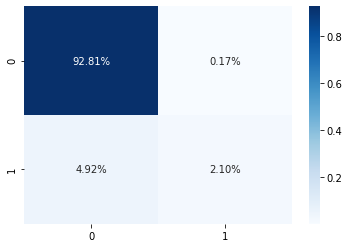

In [42]:
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8916
           1       0.93      0.30      0.45       673

    accuracy                           0.95      9589
   macro avg       0.94      0.65      0.71      9589
weighted avg       0.95      0.95      0.94      9589



In [44]:
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train)

y_pred1 = text_model.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 1])

In [45]:
text_model

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
        

In [46]:
import joblib
joblib.dump(text_model,'Sentiment_Analyser')

['Sentiment_Analyser']

In [47]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.8MB 3.5MB/s 
     |████████████████████████████████| 174kB 57.9MB/s 
     |████████████████████████████████| 4.2MB 15.0MB/s 
     |████████████████████████████████| 112kB 37.7MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 122kB 54.7MB/s 
     |████████████████████████████████| 788kB 53.2MB/s 
     |████████████████████████████████| 368kB 49.3MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is incompatible.
  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15985 sha256=0c5b6708d0654f2f2e1e3631db0d5fb943a6534138d87f5486c

In [48]:
%%writefile app.py
import streamlit as st
import joblib
st.title('Sentiment_Analyzer - Tweet_Reviews')
test_model = joblib.load('Sentiment_Analyser')
ip = st.text_input('Enter your message')
op = test_model.predict([ip])
if st.button('Predict'):
  st.title(op[0])
if (op==0):
  st.title('POSITIVE')
else :
  st.title('NEGATIVE')


Writing app.py


In [49]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://f8a1a3d161bc.ngrok.io'